<a href="https://colab.research.google.com/github/pycroscopy/AICrystallographer/blob/master/AtomNet/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Test

**Notebook prepared by Maxim Ziatdinov**

Contact e-mail: ziatdinovmax@gmail.com

This notebook shows how to get a "cleaned" image and atomic coordinates from a noisy experimental data using a trained pytorch model. Please also refer to a [GrapheneAtomFinder](https://colab.research.google.com/github/pycroscopy/AICrystallographer/blob/master/AtomNet/GrapheneAtomFinder.ipynb) notebook in this repository for important details regarding typical model limitations and how some of them can be overcome.

Notice that you can load and analyze your own data using this notebook. If you run this notebook as a [Colab notebook](https://research.google.com/colaboratory/faq.html) (recommended), please see this [tutorial](https://colab.research.google.com/github/pycroscopy/AICrystallographer/blob/master/Tutorials/ColabNotebooks_BasicOperations.ipynb) on the best practices to load your data into the notebook. Your data should be in the form of NumPy array. If your data is in .dm3 format, you may use this quick [dm3-to-numpy translator](https://colab.research.google.com/github/pycroscopy/AICrystallographer/blob/master/AtomNet/dm3-to-numpy-v2.ipynb) to convert it to numpy array.

To run it in Colab, first execute the cell below:

(alternatively, you can run it with a Jupyter Lab/Notebook on your local machine)

In [1]:
out = !python -c "import google.colab" 2>/dev/null; echo $?
if not int(out[0]):
    !git clone https://github.com/pycroscopy/AICrystallographer.git
    !cp -r AICrystallographer/AtomNet/* .

Import modules:

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import dcnn
from atomfind import *

Load experimental data:

In [3]:
# Directory and filename for the experimental image
image_dir = 'exp_data/'
image_file = 'G-Si-2nm.npy'
#Load image as numpy array and print its dimensions
imgdata = np.load(os.path.join(image_dir, image_file))
imgdata.shape

(256, 256)

Load model:

In [4]:
# specify system/lattice type (currently available: graphene, graphene-si, cubic)
system_type='graphene'
# load model
model = dcnn.load_torchmodel(system_type)

Apply a trained model to the experimental data and extract atomic coordinates

In [5]:
# Apply a trained model to the loaded data
img, dec = dl_image(imgdata, model).decode()
# Get atomic coordinates:
coord = find_atoms(dec).get_all_coordinates()

1 image was decoded in approximately 0.66 seconds
Atomic/defect coordinates extracted


Save the results:

In [6]:
np.save(os.path.join(image_dir, os.path.splitext(image_file)[0]+'-dec.npy'), img)
np.save(os.path.join(image_dir, os.path.splitext(image_file)[0]+'-coord.npy'), coord)
print('Neural network output and atomic coordinates saved to disk')

Neural network output and atomic coordinates saved to disk


Plot the results:

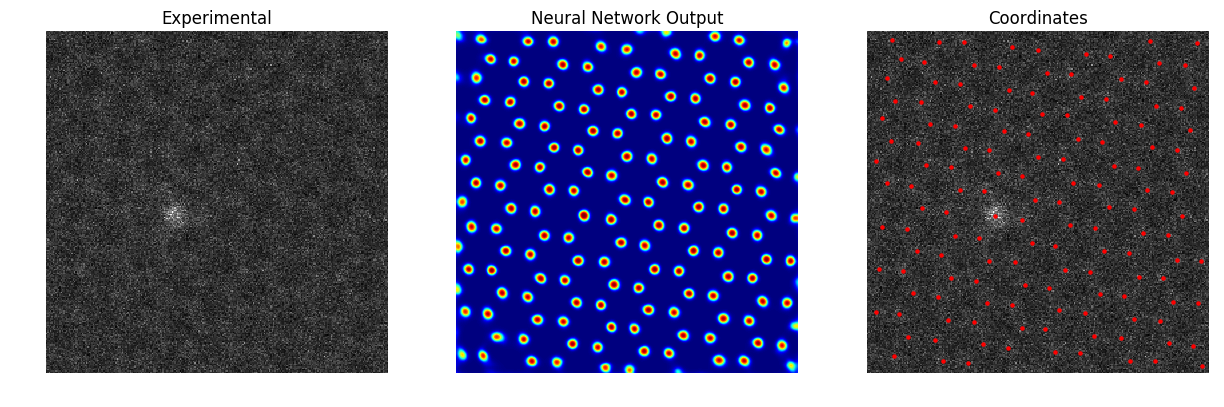

In [7]:
# Plot results ( for image stack (movie), plots the first image (frame) )
k = 0
y, x,_ = coord[0].T
fig, ax = plt.subplots(1, 3, figsize = (15, 5), dpi=100)
ax[0].imshow(img[k, :, :, 0], cmap='gray')
ax[0].set_title('Experimental')
ax[1].imshow(dec[k, :, :, 0], cmap='jet', Interpolation='Gaussian')
ax[1].set_title('Neural Network Output')
ax[2].imshow(img[k, :, :, 0], cmap='gray')
ax[2].scatter(x, y, s=5, c='red')
ax[2].set_title('Coordinates')
for _ax in fig.axes:
    _ax.axis('off')
plt.show()